<a href="https://colab.research.google.com/github/denisecammarota/matbio/blob/master/tp1/P1_Ej1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 1 - Ejercicio 1**: *Mapeo de Beverton-Holt*
***Matemática de los Sistemas Biológicos - 2021***

**Alumna**: Denise S. Cammarota


En este ejercicio, nos piden estudiar el mapeo de Beverton-Holt, que es de la forma:

\begin{align}
n_{t+1} &= \frac{r n_{t}}{1+ \frac{r-1}{K} n_{t}} \tag{1}. \\
\end{align}

A pesar de ser no lineal, este sistema se puede resolver explícitamente y tiene solución exacta:

\begin{align}
n_{t+1} &= \frac{K n_{0}}{n_{0}+ (K - n_{0}) r^{-t}} \tag{2}. \\
\end{align}


## Búsqueda de equilibrios

Primero, nos piden buscar los equilibrios del sistema. Esto simplemente lo hacemos pidiendo que para los equilibrios $n^{*}$ se cumpla:

\begin{align}
n^{*} &= \frac{r n^{*}}{1+ \frac{r-1}{K} n^{*}} \\
\end{align}

Vemos facilmente que $n^{*}_{1} = 0$ es una solución. El otro punto $n^{*}_{2}$ de equilibrio de este mapeo sale entonces como solución de la ecuación:

\begin{align}
 \frac{r}{1+ \frac{r-1}{K} n^{*}_{2}} &= 1, \\
\end{align}

y resulta ser $n^{*}_{2} = K$. 

Para resumir, tenemos dos puntos de equilibrios, que son:

\begin{cases}
      n^{*}_{1} = 0  \\ 
      n^{*}_{2} = K \\
    \end{cases}

## Estabilidad de equilibrios 

Para encontrar la estabilidad de los equilibrios, procedemos con el análisis de estabilidad lineal para sistemas dinámicos discretos. Primero, definiremos la función $f(n)$ como:

\begin{align}
 f(n) &= \frac{r n}{1+ \frac{r-1}{K} n}, \\
\end{align}

y la derivamos con respecto a $n$, de manera que:

\begin{align}
 f'(n) &= \frac{r}{\Big(1+ \frac{r-1}{K} n\Big)^2}. \\
\end{align}

Evaluando esta derivada en el primer punto de equilibrio $n^{*}_{1} = 0$, tenemos que:

\begin{align}
 |f'(0)| &= |r|. \\
\end{align}

De manera que si $r<1$, el cero es un equilibrio estable, si $r>1$ es inestable y si $r=1$ es marginalmente estable.

En cambio, evaluando $f'(n)$ en el punto de equilibrio $n^{*}_{2} = K$, obtenemos que:

\begin{align}
 |f'(K)| &= \frac{1}{|r|}. \\
\end{align}

Así, si $0<r<1$, este equilibrio es inestable, si $r>1$ es estable y si $r=1$ es marginalmente estable.

Resumiendo, tenemos que para los distintos valores de r, que los equilibrios $n^{*}_{1}$ y $n^{*}_{2}$, sus estabilidades son:

\begin{align}
n^{*}_{1} &=
 \begin{cases}
      \text{estable}  & \text{si}\ r<1  \\ 
      \text{inestable}  & \text{si}\ r>1  \\
      \text{marginalmente estable}  & \text{si}\ r=1  \\
\end{cases}
\end{align}

y

\begin{align}
n^{*}_{2} &=
 \begin{cases}
      \text{inestable}  & \text{si}\ r<1  \\ 
      \text{estable}  & \text{si}\ r>1  \\
      \text{marginalmente estable}  & \text{si}\ r=1  \\
\end{cases}
\end{align}

Tenemos entonces que existe una bifuración en función de la tasa de proliferación $r$, donde $r_{c} = 1$ es el valor crítico de este parámetro. En la celda a continuación, hacemos  el diagrama de bifurcación correspondiente.

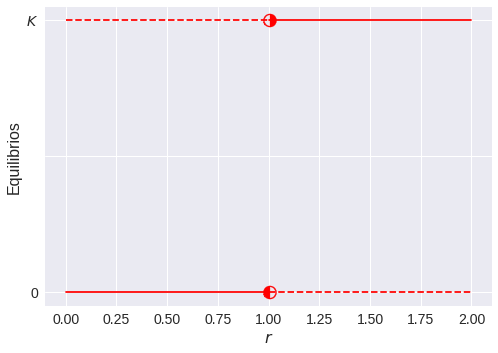

In [ ]:
#@title 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
x1 = np.linspace(0,1,100)
x2 = np.linspace(1,2,100)
y1 = np.zeros(shape = x1.shape) 
y2 = np.zeros(shape = x1.shape) + 1
plt.plot(x1,y1,'r')
plt.plot(x2,y1,'--r')
plt.plot(x1,y2,'--r')
plt.plot(x2,y2,'r')
plt.xlabel('$r$',fontsize=16)
plt.ylabel('Equilibrios',fontsize=16)
plt.scatter(1,0,marker="$◐$", c="r",s=200)
plt.scatter(1,1,marker="$◑$", c="r",s=200)
y = [0,0.5,1]
labels = [0,'','$K$']
plt.yticks(y, labels,fontsize=14)
plt.xticks(fontsize=14)
plt.show()

## Comportamiento del mapeo para diferentes condiciones iniciales


Dibujamos algunas trayectorias del sistema para distintos valores de $r$. La primera figura corresponde para $r=2$, mientras que la segunda corresponde a $r=0.5$. Utilizamos $K=1$ en ambos casos, y diferentes condiciones iniciales para ilustrar la estabilidad de los equilibrios. Tenemos entonces que $n^{*}_{1} = 0$ y $n^{*}_{2} = 1$. 

Primero, para el caso de $r=2$, observamos que tanto 0 como 1 son puntos de equilibrios. Por ello, cuando comenzamos con estos como condiciones iniciales, las trayectorias permanecen constantes. En este caso, el 0 es un equilibrio inestable y el 1 es estable. Por ello, observamos que las trayectorias se alejan del 0 y se acercan al 1, cuando comenzamos con una condición inicial que no constituye un equilibrio. 

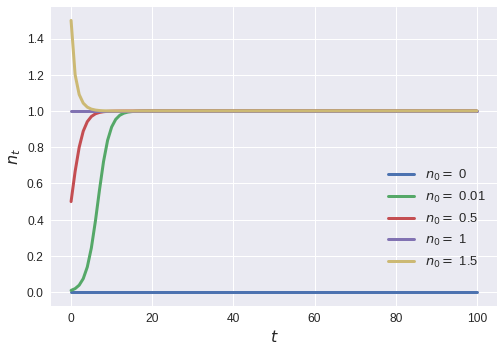

In [ ]:
#@title 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

def sol_ej4(r,K,n0,t):
  y = (K*n0)/(n0 + (K-n0)*(r**(-t)))
  return y

t = np.linspace(0,100,101)
r = 2 #para r>1
K = 1
n0 = [0,0.01,0.5,1,1.5]

for i in n0:
  n = sol_ej4(r,K,i,t)
  plt.plot(t,n,linewidth=3,label='$n_{0}=$ '+str(i))

plt.xlabel('$t$',fontsize=16)
plt.ylabel('$n_{t}$',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=13,loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.show()

En cambio, para $r=0.5$, las estabilidades de los equilibrios se invierten. Mientras que el 0 es estable, la unidad se torna en un punto inestable. Esto se refleja en el comportamiento de las trayectorias: estas ahora se alejan de la unidad y se acercan al 0. 

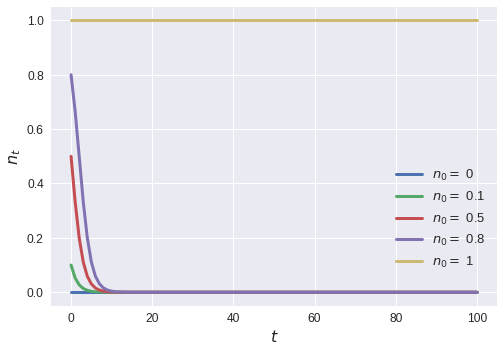

In [ ]:
#@title 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

def sol_ej4(r,K,n0,t):
  y = (K*n0)/(n0 + (K-n0)*(r**(-t)))
  return y

t = np.linspace(0,100,101)
r = 0.5 #para r<1
K = 1
n0 = [0,0.1,0.5,0.8,1]

for i in n0:
  n = sol_ej4(r,K,i,t)
  plt.plot(t,n,linewidth=3,label='$n_{0}=$ '+str(i))

plt.xlabel('$t$',fontsize=16)
plt.ylabel('$n_{t}$',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=13,loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.show()